In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import cm as colormap
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import os

In [2]:
model = load_model("MobileNetV2/model_mobilenet_600.h5")

In [3]:
BASE_DIR = 'D:/Kuliah/Skripsi/plant-images-dataset-600'
print(f"list directory: {sorted(os.listdir(BASE_DIR))}")

TEST_DIR = os.path.join(BASE_DIR, 'test')
print(f"test directory: {sorted(os.listdir(TEST_DIR))}")

test_datagen = ImageDataGenerator(
                    rescale=1./255)


list directory: ['test', 'train', 'val']
test directory: ['Bayam', 'Jagung', 'Jambu Air', 'Jambu Biji', 'Jeruk', 'Kacang Panjang', 'Kangkung', 'Kelapa', 'Kentang', 'Kubis', 'Mangga', 'Melon', 'Mentimun', 'Nanas', 'Pepaya', 'Pisang', 'Semangka', 'Singkong', 'Terung', 'Tomat', 'Ubi Ungu', 'Wortel']


In [4]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
LABEL_MODE = 'categorical'
BUFFER_SIZE = tf.data.AUTOTUNE

def load_generator(datagen, PATH, IMAGE_SIZE, BATCH_SIZE, LABEL_MODE):
  generator = datagen.flow_from_directory(
    PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode=LABEL_MODE,
    shuffle=False if PATH == TEST_DIR else True,
    seed=42
  )
  return generator

test_generator = load_generator(test_datagen, TEST_DIR, IMAGE_SIZE, BATCH_SIZE, LABEL_MODE)

Found 2640 images belonging to 22 classes.


In [5]:
num_test_files = sum([len(files) for r, d, files in os.walk(TEST_DIR)])
num_test_steps = num_test_files // BATCH_SIZE

acc = model.evaluate(test_generator, batch_size=BATCH_SIZE, verbose=1, steps=num_test_steps)[1] * 100
print(f"Accuracy on the test set is {acc:.2f} %")

c:\Users\ALFIAN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 345ms/step - accuracy: 0.9417 - loss: 0.2187
Accuracy on the test set is 95.43 %


83/83 ━━━━━━━━━━━━━━━━━━━━ 45s 521ms/step


C:\Users\ALFIAN\AppData\Local\Temp\ipykernel_14312\1543736279.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = colormap.get_cmap('tab10', len(filtered_labels)).colors


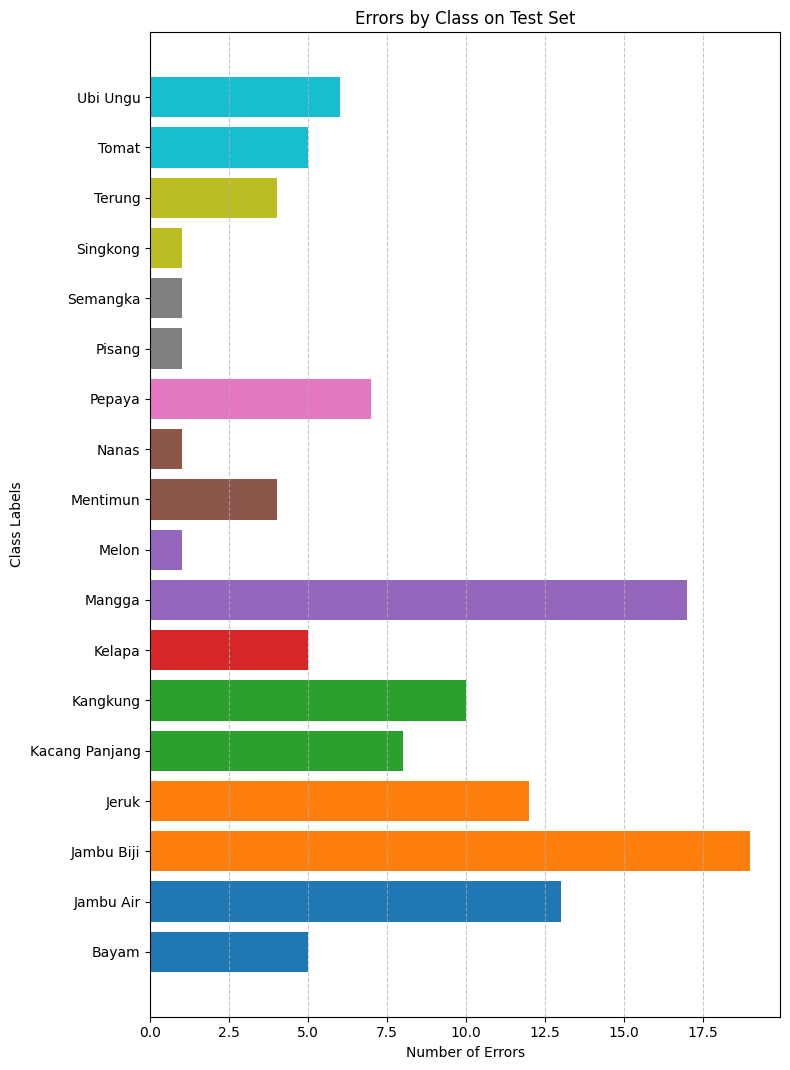

In [6]:
predictions = model.predict(test_generator, verbose=1)

y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)
errors_per_class = conf_matrix.sum(axis=1) - np.diag(conf_matrix)

class_labels = list(test_generator.class_indices.keys())

filtered_labels = [label for label, errors in zip(class_labels, errors_per_class) if errors > 0]
filtered_errors = [errors for errors in errors_per_class if errors > 0]

colors = colormap.get_cmap('tab10', len(filtered_labels)).colors

plt.figure(figsize=(8, len(filtered_labels) * 0.6))
plt.barh(filtered_labels, filtered_errors, color=colors)
plt.title('Errors by Class on Test Set', fontsize=12)
plt.xlabel('Number of Errors', fontsize=10)
plt.ylabel('Class Labels', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

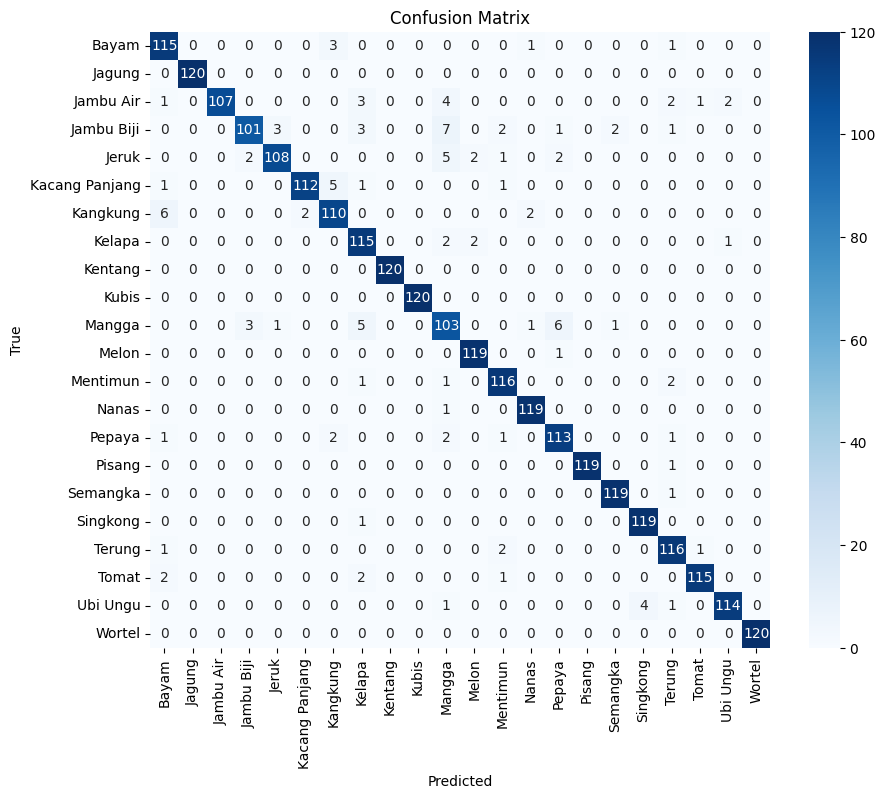

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [8]:
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()

print("Classification Report:")
print(report_df.round(4))

Classification Report:
                precision  recall  f1-score    support
Bayam              0.9055  0.9583    0.9312   120.0000
Jagung             1.0000  1.0000    1.0000   120.0000
Jambu Air          1.0000  0.8917    0.9427   120.0000
Jambu Biji         0.9528  0.8417    0.8938   120.0000
Jeruk              0.9643  0.9000    0.9310   120.0000
Kacang Panjang     0.9825  0.9333    0.9573   120.0000
Kangkung           0.9167  0.9167    0.9167   120.0000
Kelapa             0.8779  0.9583    0.9163   120.0000
Kentang            1.0000  1.0000    1.0000   120.0000
Kubis              1.0000  1.0000    1.0000   120.0000
Mangga             0.8175  0.8583    0.8374   120.0000
Melon              0.9675  0.9917    0.9794   120.0000
Mentimun           0.9355  0.9667    0.9508   120.0000
Nanas              0.9675  0.9917    0.9794   120.0000
Pepaya             0.9187  0.9417    0.9300   120.0000
Pisang             1.0000  0.9917    0.9958   120.0000
Semangka           0.9754  0.9917    0.983